## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems (ICIP 2021)

In [1]:
%matplotlib inline 

# from imports import *
import torch
import matplotlib.pyplot as plt
import numpy as np
from algorithms import *
from Utilities import display_results
import sys
sys.path.append('problems/')
sys.path.append('denoisers/')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
from problems.CSMRI import CSMRI
from denoisers.BM3D import BM3DDenoiser

# Figures 1: Compare Image Fidelity for Different Algorithms 

In [3]:
im_height, im_width = 256, 256  # Image dimensions
samp_rate = 0.5                 # Pick a number 0 < SR <= 1
sigma_true = 5.0                # Select std dev of AWGN
snr = 0.

main_problem = CSMRI('./data/13.png', H=im_height, W=im_width, sample_prob=samp_rate, snr=snr)

0.39086118507291523


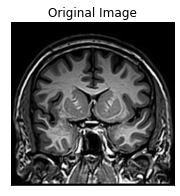

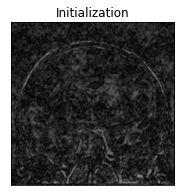

In [4]:
main_problem.display(show_measurements=False, save_results=True)
print(main_problem.sigma)

In [13]:
denoiser = BM3DDenoiser()
results_svrg = pnp_svrg(main_problem, denoiser=denoiser, eta=5e-3, tt=60, T2=10, mini_batch_size=500, verbose=True)

0 0 Before denoising:  12.462966554827426
After denoising update: 0 0 12.483187477044739
0 1 Before denoising:  12.499037162742466
After denoising update: 0 1 12.506101800622652
0 2 Before denoising:  12.521906606252793
After denoising update: 0 2 12.526348488468495
0 3 Before denoising:  12.542071801611828
After denoising update: 0 3 12.545290542004748
0 4 Before denoising:  12.560928559191481
After denoising update: 0 4 12.563406129814085
0 5 Before denoising:  12.578985912483844
After denoising update: 0 5 12.580938665689281
0 6 Before denoising:  12.596416726470645
After denoising update: 0 6 12.598005422291669
0 7 Before denoising:  12.613465959619688
After denoising update: 0 7 12.614779840201358
0 8 Before denoising:  12.63025750808639
After denoising update: 0 8 12.631339874219623
0 9 Before denoising:  12.646845354574124
After denoising update: 0 9 12.647714963696215
1 0 Before denoising:  12.662930641116452
After denoising update: 1 0 12.663631981048391
1 1 Before denoising: 

Output PSNR: 15.6	Change in PSNR: 7.40	Gradient Time: 53.32	Denoising Time: 53.32


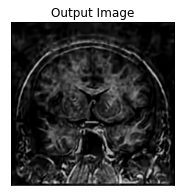

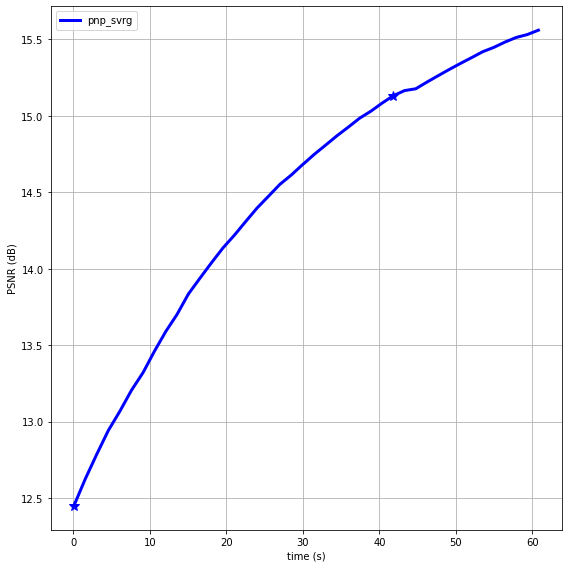

In [8]:
master_psnr_fig = display_results(main_problem, results_svrg, save_results=True)

In [ ]:
denoiser = BM3DDenoiser()
results_sgd = pnp_sgd(main_problem, denoiser=denoiser, eta=1e-1, tt=10, mini_batch_size=1000, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_sgd, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_est=.01)
results_gd = pnp_gd(main_problem, denoiser=denoiser, eta=1e-2, tt=10, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_gd, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_est=.01)
results_saga = pnp_saga(main_problem, denoiser=denoiser, eta=1e-2, tt=10, mini_batch_size=1, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_saga, save_results=True)

In [ ]:
denoiser = BM3DDenoiser(sigma_est=.01)
results_sarah = pnp_sarah(main_problem, denoiser=denoiser, eta=1e-2, tt=10, T2=10, mini_batch_size=1, verbose=True)

In [ ]:
master_psnr_fig = display_results(main_problem, results_sarah, save_results=True)

# Figure 2(a): Compare PSNR over time using NLM

## Figure 2(b): Compare Sampling Ratio for each PnP Algorithm

## Figure 3: Compare Image Denoising Routines with PnP-SVRG using RGB Images